In [ ]:
import numpy as np
import librosa
from scipy.io import wavfile

In [24]:
class DataGenerator(object):
    def __init__(self):
        self.input_dir = ''

        self.sample_rate = 16000
        self.duration = 1.  # sec
        self.n_fft = 512
        self.n_mels = 64
        self.msg_w = 256

        # random mixing settings
        self.mix_with = {}
        self.mix_with[self.input_dir +
                      '/_background_noise_/doing_the_dishes.wav'] = {
                          volume: [1., 0.25],
                          probability: 1
                      }
        self.mix_with[self.input_dir +
                      '/_background_noise_/exercise_bike.wav'] = {
                          volume: [1., 0.25],
                          probability: 1
                      }

    # compute mel-scaled spectrogram
    def msg(self, wave):

        hop_length = int(1 + self.duration * self.sample_rate //
                         (self.msg_w - 1))
        desired_wave_len = int(hop_length * (self.msg_w - 1))

        # pad wave if neccessary to get the desired msg width
        if desired_wave_len > len(wave):
            wave = np.pad(
                wave, (0, desired_wave_len - len(wave)),
                'constant',
                constant_values=(0.))

        # trim wave if it's too long
        elif len(wave) > desired_wave_len:
            wave = wave[:desired_wave_len]

        msg = librosa.feature.melspectrogram(
            y=wave,
            sr=self.sample_rate,
            hop_length=hop_length,
            n_fft=self.n_fft,
            n_mels=self.n_mels)
        msg = librosa.logamplitude(msg**2, ref_power=1.)

        return msg.astype(np.float32)

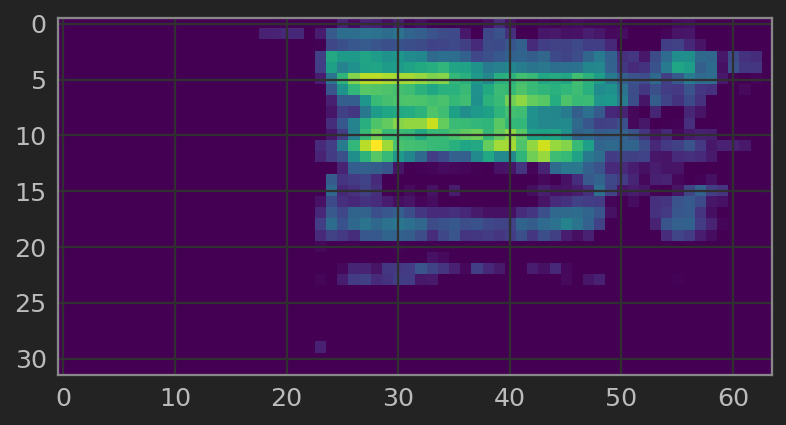

In [42]:
if __name__ == '__main__':
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    from jupyterthemes import jtplot
    jtplot.style()
    
    import IPython.display as ipd
    
    f = '/d2/caches/tf-speech/train/audio/dog/00b01445_nohash_0.wav'
    dg = DataGenerator()
    dg.n_mels = 32
    dg.msg_w = 64
    m = dg.msg(wavfile.read(f)[1])
    plt.imshow(m)

In [44]:
!ls /d2/caches/tf-speech/train/audio/_background_noise_/ 

doing_the_dishes.wav  exercise_bike.wav  README.md	  white_noise.wav
dude_miaowing.wav     pink_noise.wav	 running_tap.wav
